In [1]:
using Flux
using Zygote
using Statistics
using Plots
include("./AfqsJuliaUtil.jl")
using .AfqsJuliaUtil

┌ Info: Recompiling stale cache file /Users/afq/.julia/compiled/v1.1/Zygote/4kbLI.ji for Zygote [e88e6eb3-aa80-5325-afca-941959d7151f]
└ @ Base loading.jl:1184


# Fitting a Linear Model

In [2]:
d = Dense(2,2)

Dense(2, 2)

In [3]:
dat_x = Azip(1f0:0.1f0:10f0, 1f0:0.1f0:10f0);
dat_y = 3.2f0.*dat_x .- 0.2f0;

In [4]:
dat_x

2×91 Array{Float32,2}:
 1.0  1.1  1.2  1.3  1.4  1.5  1.6  …  9.4  9.5  9.6  9.7  9.8  9.9  10.0
 1.0  1.1  1.2  1.3  1.4  1.5  1.6     9.4  9.5  9.6  9.7  9.8  9.9  10.0

In [5]:
dat_y

2×91 Array{Float32,2}:
 3.0  3.32  3.64  3.96  4.28  4.6  4.92  …  30.52  30.84  31.16  31.48  31.8
 3.0  3.32  3.64  3.96  4.28  4.6  4.92     30.52  30.84  31.16  31.48  31.8

In [6]:
d(dat_x)

Tracked 2×91 Array{Float32,2}:
 -1.43084   -1.57393   -1.71701   …  -14.0222   -14.1653   -14.3084 
 -0.528699  -0.581569  -0.634439      -5.18125   -5.23412   -5.28699

In [7]:
pars=params(d)
loss(x,y) = Flux.mse( y, d(x) )
grads = Flux.Tracker.gradient(() -> loss(dat_x, dat_y)/length(dat_x), pars)

Grads(...)


In [8]:
for l in pars println(l) end

Float32[-0.797466 -0.633375; -0.138347 -0.390352] (tracked)
Float32[0.0, 0.0] (tracked)


In [9]:
for epoch = 1:10
    r = 1.0
    l = loss(dat_x,dat_y)
    grads = Flux.Tracker.gradient(() -> loss(dat_x, dat_y)/length(dat_x), pars)
    for p in pars
        Flux.Tracker.update!(p, -r*grads[p])
    end
    println(l, pars...)
end

647.4316f0 (tracked)Float32[0.141741 0.305832; 0.616714 0.364709] (tracked)Float32[0.138844, 0.111582] (tracked)
223.32353f0 (tracked)Float32[0.693329 0.85742; 1.06016 0.808151] (tracked)Float32[0.22016, 0.176914] (tracked)
77.05298f0 (tracked)Float32[1.01728 1.18137; 1.32059 1.06859] (tracked)Float32[0.267691, 0.215087] (tracked)
26.605673f0 (tracked)Float32[1.20754 1.37163; 1.47355 1.22155] (tracked)Float32[0.295382, 0.237309] (tracked)
9.206863f0 (tracked)Float32[1.31929 1.48339; 1.5634 1.31139] (tracked)Float32[0.311422, 0.250164] (tracked)
3.2061236f0 (tracked)Float32[1.38494 1.54903; 1.61618 1.36417] (tracked)Float32[0.320619, 0.257518] (tracked)
1.1364695f0 (tracked)Float32[1.42351 1.5876; 1.64719 1.39518] (tracked)Float32[0.325797, 0.261642] (tracked)
0.42260367f0 (tracked)Float32[1.44618 1.61027; 1.66541 1.41341] (tracked)Float32[0.328617, 0.26387] (tracked)
0.17633706f0 (tracked)Float32[1.4595 1.6236; 1.67613 1.42412] (tracked)Float32[0.33005, 0.264983] (tracked)
0.09134139f0

In [10]:
d(dat_x)

Tracked 2×91 Array{Float32,2}:
 3.42946  3.73934  4.04922  4.35909  …  30.3889  30.6988  31.0087  31.3185
 3.37831  3.6896   4.00089  4.31217     30.4603  30.7716  31.0829  31.3941

In [11]:
pars

Params([Float32[1.46735 1.63144; 1.68244 1.43043] (tracked), Float32[0.330671, 0.265442] (tracked)])

# Fitting a Linear Model Under the Hood

The two-point check

In [12]:
dat_x = [1.0,2.0]
dat_y = 3*dat_x .+ 1

2-element Array{Float64,1}:
 4.0
 7.0

A standard linear regression dataset

In [13]:
dat_x = collect(1:0.1:10);
dat_y = 3.2*dat_x .- 0.2 .+ rand(length(dat_x));

In [14]:
W = param([2]);
b = param([2]);
f(x) = W.*x.+b;

In [15]:
pars=Flux.Tracker.Params([W,b])
loss(x,y) = Flux.mse(y,f(x))
grads = Flux.Tracker.gradient(() -> loss(dat_x, dat_y), pars)

Grads(...)


Verify that my definition of the loss made sense:

In [16]:
sum((dat_y - f(dat_x)).^2)/length(dat_y)

34.11751320079661 (tracked)

In [17]:
Flux.mse(dat_y,f(dat_x))

34.11751320079661 (tracked)

In [18]:
loss(dat_x,dat_y)

34.11751320079661 (tracked)

In [19]:
grads[W], grads[b]

([-70.6418] (tracked), [-9.87782] (tracked))

0.5818582844906668 (tracked)
0.5468006147759126 (tracked)
0.5142056798924736 (tracked)
0.483896476380701 (tracked)
0.45571271651674644 (tracked)
0.4295053528108488 (tracked)
0.40513578978133963 (tracked)
0.3824751510038669 (tracked)
0.36140359755905044 (tracked)
0.3418096942742437 (tracked)
0.3418096942742437 (tracked)


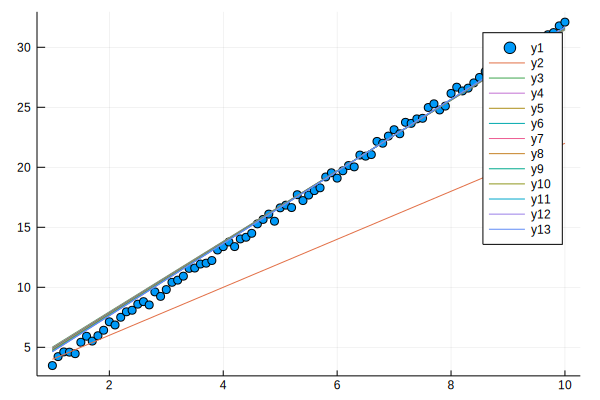

In [20]:
scatter(dat_x,dat_y)
plot!(dat_x,map(y->y.data,f(dat_x)))
for epoch = 1:1000
    r = 0.001
    grads = Flux.Tracker.gradient(() -> loss(dat_x, dat_y), pars)
    #println(W
    for p in (W,b)
        Flux.Tracker.update!(p, -r*grads[p])
    end
    if epoch % 100 == 0
        println(loss(dat_x,dat_y))
        plot!(dat_x,map(y->y.data,f(dat_x)))
    end
end
println(loss(dat_x,dat_y))
plot!(dat_x,map(y->y.data,f(dat_x)))

In [21]:
typeof(f(dat_x))

TrackedArray{…,Array{Float64,1}}

In [22]:
Float64(x::Tracker.TrackedReal{Float64}) = Float64(x.data)

Float64

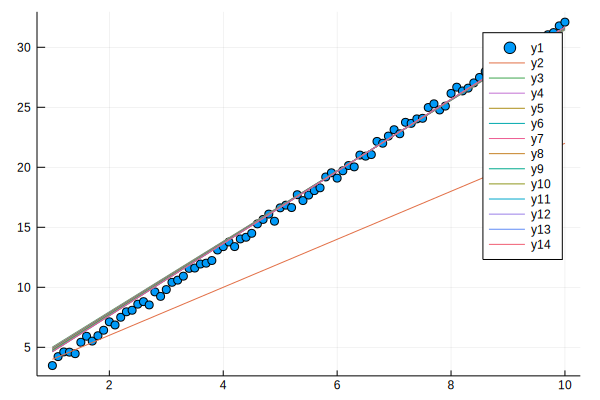

In [23]:
plot!(dat_x,f(dat_x))

## Minimal reproducing example

In [24]:
loss(dat_x,dat_y)

0.3418096942742437 (tracked)

In [25]:
loss(dat_x[1],dat_y[1])

1.3189477455076821 (tracked)

In [26]:
loss(dat_x[2:10],dat_y[2:10])

0.8665761418013613 (tracked)

In [27]:
loss(dat_x[2:12],dat_y[2:12])

0.836960535313484 (tracked)

In [28]:
grads_by_size(N) = Flux.Tracker.gradient(() -> loss(dat_x[1:N], dat_y[1:N]), pars)

grads_by_size (generic function with 1 method)

In [29]:
dat_x = collect(1:0.1:10);
dat_y = 3.2*dat_x .- 0.2 .+ rand(length(dat_x));
W = param([2]);
b = param([2]);
f(x) = W.*x.+b;
pars=Flux.Tracker.Params([W,b])
loss(x,y) = Flux.mse(y,f(x))

monitor_freq = 100
for epoch = 1:1000
    r = 0.0001
    grads = Flux.Tracker.gradient(() -> loss(dat_x, dat_y), pars)
    for p in (W,b)
        Flux.Tracker.update!(p, -r*grads[p])
    end
    if epoch % monitor_freq == 0
        println(loss(dat_x,dat_y))
    end
end

8.024493576520774 (tracked)
2.3483555875787974 (tracked)
1.1086735553151752 (tracked)
0.8349429084872596 (tracked)
0.7715508664204291 (tracked)
0.7539820954392068 (tracked)
0.7464174390567262 (tracked)
0.7410580050798741 (tracked)
0.7362055903340161 (tracked)
0.7314902602572941 (tracked)


# Hessian

In [30]:
dat_x = collect(1:0.1:10);
dat_y = 3.2*dat_x .- 0.2 .+ rand(length(dat_x));
W = param([2]);
b = param([2]);
f(x) = W.*x.+b;
pars=Flux.Tracker.Params([W,b]);
loss(x,y) = Flux.mse(y,f(x));
grads = Flux.Tracker.gradient(() -> loss(dat_x, dat_y), pars);

In [31]:
hess = Flux.Tracker.hessian(() -> loss(dat_x, dat_y), pars);

MethodError: MethodError: no method matching param(::Tracker.Params)
Closest candidates are:
  param(!Matched::Tracker.TrackedReal) at /Users/afq/.julia/packages/Tracker/6wcYJ/src/Tracker.jl:107
  param(!Matched::Number) at /Users/afq/.julia/packages/Tracker/6wcYJ/src/Tracker.jl:103
  param(!Matched::TrackedArray) at /Users/afq/.julia/packages/Tracker/6wcYJ/src/Tracker.jl:108
  ...

In [32]:
Flux.Tracker.forward_jacobian(grads,pars)

MethodError: MethodError: no method matching size(::Tracker.Params)
Closest candidates are:
  size(!Matched::BitArray{1}) at bitarray.jl:77
  size(!Matched::BitArray{1}, !Matched::Any) at bitarray.jl:81
  size(!Matched::Core.Compiler.StmtRange) at show.jl:1561
  ...

In [90]:
Zygote.hessian(() -> loss(dat_x, dat_y),pars)

MethodError: MethodError: no method matching hessian(::getfield(Main, Symbol("##215#216")), ::Tracker.Params)
Closest candidates are:
  hessian(::Any, !Matched::AbstractArray) at /Users/afq/.julia/packages/Zygote/mlF4T/src/lib/utils.jl:12

In [35]:
gw=grads[W]

Tracked 1-element Array{Float64,1}:
 -70.46110382725352

In [36]:
gw

Tracked 1-element Array{Float64,1}:
 -70.46110382725352

In [37]:
pars

Params([[2.0] (tracked), [2.0] (tracked)])

In [87]:
Flux.Tracker.forward_jacobian( (()->grads[W][1]) , W )

MethodError: MethodError: no method matching (::getfield(Main, Symbol("##211#212")))(::Array{ForwardDiff.Dual{Nothing,Tracker.TrackedReal{Float64},3},2})
Closest candidates are:
  #211() at In[87]:1

# Type sanitation of Tracker

In [39]:
Float64(f(dat_x)[1])

4.0

In [40]:
Float64(W)

MethodError: MethodError: no method matching Float64(::TrackedArray{…,Array{Float64,1}})
Closest candidates are:
  Float64(!Matched::Int8) at float.jl:60
  Float64(!Matched::Int16) at float.jl:60
  Float64(!Matched::Int32) at float.jl:60
  ...

In [41]:
Base.convert(::Type{T},x::Tracker.TrackedReal{T}) where {T} = T(x.data)

In [42]:
#Real(x::Tracker.TrackedReal{T}) where T<:Real = Real(x.data)

# Training Polynomials

In [2]:
dat_x = collect(1:0.1:10);
dat_y = 0.1*dat_x.^2 .+ 5;

In [3]:
dat_x = reshape(dat_x,(1,91));
dat_y = reshape(dat_y,(1,91));

In [4]:
poly = AfqsJuliaUtil.@polynomial_function(1,3)

#55#poly (generic function with 4 methods)

In [5]:
poly(dat_x)

3×91 Array{Float64,2}:
 1.0  1.1    1.2    1.3    1.4    1.5    …    9.7      9.8      9.9      10.0
 1.0  1.21   1.44   1.69   1.96   2.25       94.09    96.04    98.01    100.0
 1.0  1.331  1.728  2.197  2.744  3.375     912.673  941.192  970.299  1000.0

In [6]:
W = param(rand(1,3));
b = param([2]);
f(x) = W*poly(x).+b;
pars=Flux.Tracker.Params([W,b])
loss(x,y) = Flux.mse(y,f(x))

loss (generic function with 1 method)

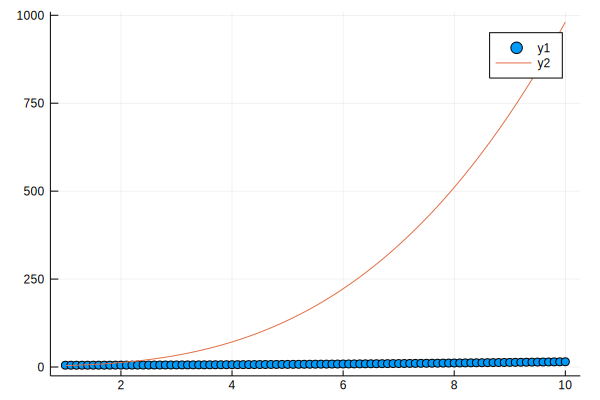

In [7]:
scatter(dat_x',dat_y')
plot!(dat_x',map(y->y.data,f(dat_x))')

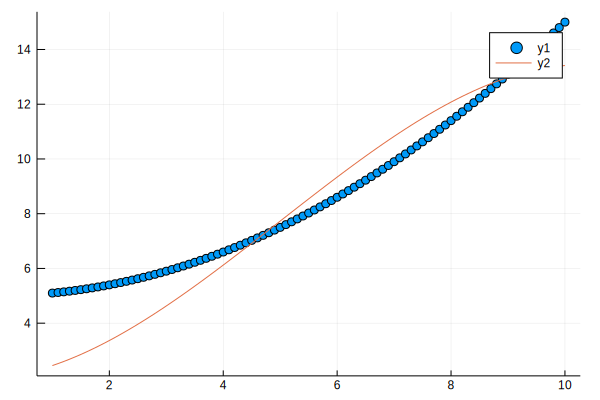

In [30]:
monitor_freq = 2500
scatter(dat_x',dat_y')
for epoch = 1:1000
    r = 1.0e-6
    grads = Flux.Tracker.gradient(() -> loss(dat_x, dat_y), pars)
    for p in (W,b)
        Flux.Tracker.update!(p, -r*grads[p])
    end
    if epoch % monitor_freq == 0
        println(loss(dat_x,dat_y))
        plot!(dat_x',map(y->y.data,f(dat_x))')
    end
end
plot!(dat_x',map(y->y.data,f(dat_x))')


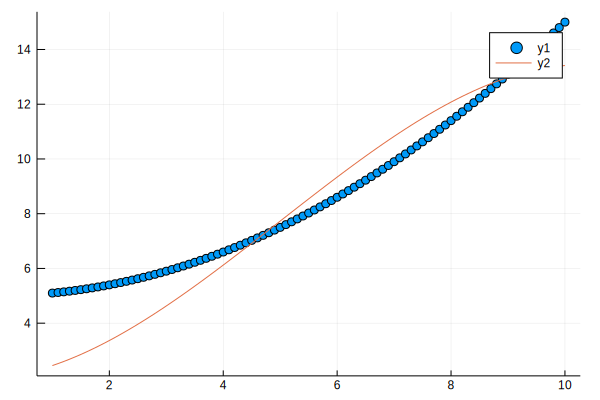

In [31]:
scatter(dat_x',dat_y')
plot!(dat_x',map(y->y.data,f(dat_x))')

# As an explicit function with parameters in the argument

Flux allows implicit parameter definitions that get picked up, but the differentiators work better with explicit function arguments. Philosophically, I like that better too.


In [2]:
dat_x = collect(1:0.1:10);
dat_y = 0.1*dat_x.^2 .+ 5;
dat_x = reshape(dat_x,(1,length(dat_x)));
dat_y = reshape(dat_y,(1,length(dat_y)));

In [3]:
poly = AfqsJuliaUtil.@polynomial_function(1,3)
W0 = rand(1,3);
b0 = [2.0];
struct mypars
    W
    b
end
P0 = mypars(W0,b0)
f(x,P) = P.W*poly(x).+P.b;
# pars=Flux.Tracker.Params([W,b])
loss(x,y, P) = Flux.mse(y,f(x,P))

loss (generic function with 1 method)

In [4]:
 poly(dat_x)

3×91 Array{Float64,2}:
 1.0  1.1    1.2    1.3    1.4    1.5    …    9.7      9.8      9.9      10.0
 1.0  1.21   1.44   1.69   1.96   2.25       94.09    96.04    98.01    100.0
 1.0  1.331  1.728  2.197  2.744  3.375     912.673  941.192  970.299  1000.0

In [5]:
b0

1-element Array{Float64,1}:
 2.0

In [6]:
f(dat_x,P0)

1×91 Array{Float64,2}:
 3.95832  4.37773  4.85844  5.40562  …  817.183  842.256  867.839  893.938

In [7]:
loss(1,2,P0)

3.8350298475918523

In [13]:
Zygote.gradient( (P->loss(dat_x,dat_y, P)), P0 )

((W = [3980.42 33311.0 2.8676e5], b = [495.272]),)

In [14]:
Zygote.hessian( (P->loss(dat_x,dat_y, P)), P0 )

MethodError: MethodError: no method matching hessian(::getfield(Main, Symbol("##15#16")), ::mypars)
Closest candidates are:
  hessian(::Any, !Matched::AbstractArray) at /Users/afq/.julia/packages/Zygote/p7pxY/src/lib/utils.jl:12

In [15]:
] add Zygote#mutate

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
  Updating git-repo `https://github.com/FluxML/Zygote.jl.git`
 Resolving package versions...
  Updating `~/.julia/environments/v1.1/Project.toml`
  [e88e6eb3] ~ Zygote v0.2.0+ #master (https://github.com/FluxML/Zygote.jl.git) ⇒ v0.2.0+ #mutate (https://github.com/FluxML/Zygote.jl.git)
  Updating `~/.julia/environments/v1.1/Manifest.toml`
  [e88e6eb3] ~ Zygote v0.2.0+ #master (https://github.com/FluxML/Zygote.jl.git) ⇒ v0.2.0+ #mutate (https://github.com/FluxML/Zygote.jl.git)
